In [1]:
from datascience import *
%matplotlib inline
path_data = '.../.../.../assets/data/'

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Centre & Spread

# Average (Mean)

In [2]:
values = make_array(2, 3, 3, 9)
values


array([2, 3, 3, 9], dtype=int64)

In [3]:
def summary():  
    return (sum(values)/len(values),
            
            np.average(values), np.mean(values), #Both are same
            
            ((2+3+3+9)/4), 
            
            (2*1/4 + 3*2/4 + 9*1/4),
            
           (2*0.25 + 3*0.5 + 9*0.25))

In [4]:
summary()

(4.25, 4.25, 4.25, 4.25, 4.25, 4.25)

In [5]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


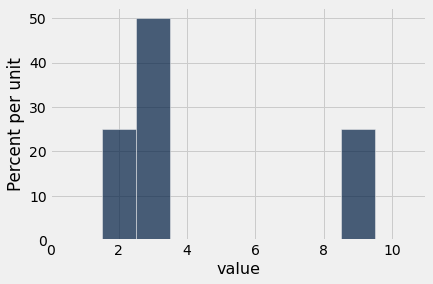

In [6]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins=bins_for_display)

In [7]:
new_vals = make_array(2,2,2,2,2,2,2,2,2,2,
                     3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                     9,9,9,9,9,9,9,9,9,9)

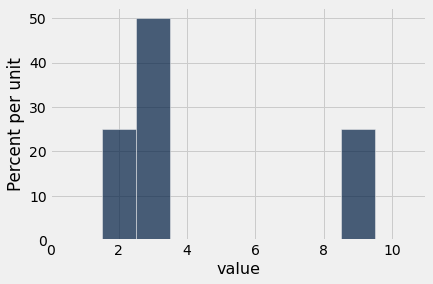

In [8]:
Table().with_column('value', new_vals).hist(bins=bins_for_display)

In [9]:
np.average(values)

4.25

In [10]:
np.average(new_vals)

4.25

## Reason not to round an average value

Text(0.5, 1.0, 'Average as a centre of Gravity')

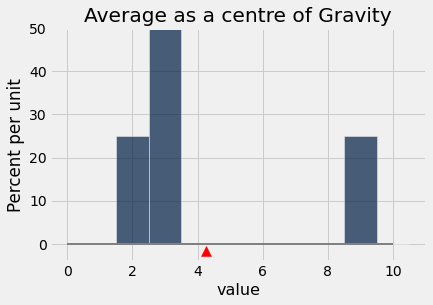

In [11]:
Table().with_column('value', new_vals).hist(bins=bins_for_display)

plt.ylim(-0.04, 0.5)
plt.plot([0, 10], [0,0], color='grey', lw=2)
plt.scatter(4.25, -0.015, marker= "^", color='red', s=100)
plt.title("Average as a centre of Gravity")

### *The Average is Based on the Histogram (not the count)*

In [12]:
#============================================================

## Standard Deviation

In [13]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [14]:
average_value = np.mean(values)
average_value

4.25

In [15]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [16]:
sum(deviations)

0.0

In [17]:
print("======================================================")
print("=============DOLLARS SQUARED/UNIT SQUARED==================")
sd_table = sd_table.with_column('Standard Deviation', deviations**2)
sd_table

=============DOLLARS SQUARED/UNIT SQUARED==================


Value,Deviation,Standard Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [18]:
#Variance of the data
#mean squared deviation from average

print("=======DOLLAR SQUARED/UNIT SQUARED======")
variance = np.mean(deviations**2)
variance

=======DOLLAR SQUARED/UNIT SQUARED======


7.6875

In [19]:
#Variance of the data
#mean squared deviation from average

print("=======DOLLARS /ORIGINAL UNIT ======")
sd = variance  ** 0.5
sd

=======DOLLARS /ORIGINAL UNIT ======


2.7726341266023544

In [21]:
#NumPy function
np.std(values)

2.7726341266023544

# #cHEBYSHEV'S INEQUALITY

In [22]:
#Mean +- zSTDDEVIATIONS

#At least [1 - 1/z^2] part of the data.
#No matter what the distribution looks like.

## Chebyshev's Bounds

In [23]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')

In [24]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

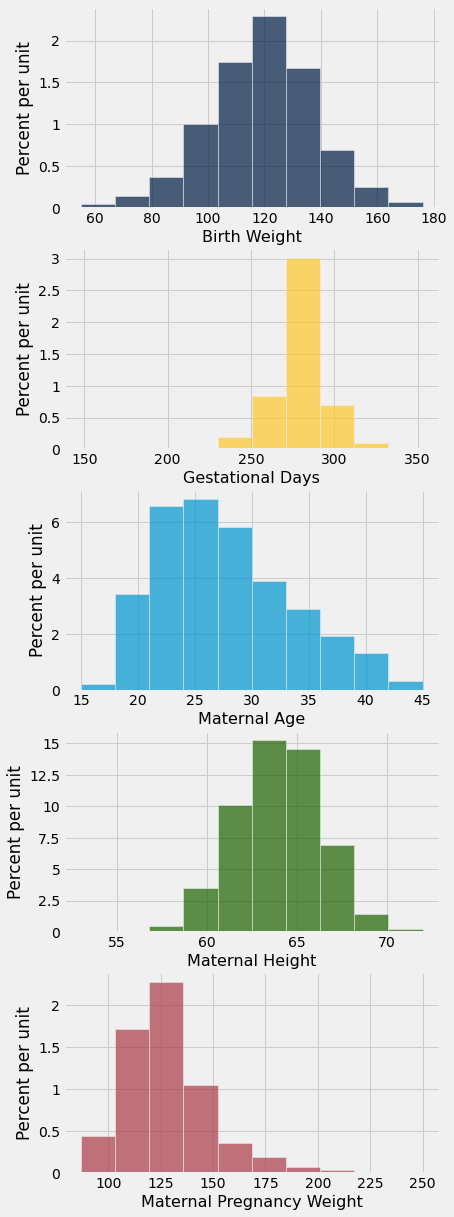

In [27]:
births.hist(overlay=False)

In [30]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.72544970428041)

In [32]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', are.between((mean - 3*sd), (mean+3*sd)))

In [34]:
#Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [36]:
#Chebyshev's bound:
#This proportion should be at least

1 - 1/(3**2)

0.8888888888888888

In [37]:
#Thus, consistent with the bound

## Standard Units

In [38]:
def standard_units(x):
    """Convert array to standard units"""
    return(x-np.mean(x)) / np.std(x)

In [39]:
ages = births.column('Maternal Age')

In [40]:
ages_standard_units = standard_units(ages)

In [46]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [50]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

NameError: name 'both' is not defined